It is a **tiny vision-language model**.
It uses the SigLIP-L as the vision encoder and is constructed based on the **DeepSeek-LLM-1.3b-base**.

In [ ]:
!git clone https://github.com/deepseek-ai/DeepSeek-VL
%cd DeepSeek-VL

In [ ]:
!pip install -e .

In [3]:
!pwd

/content/DeepSeek-VL


In [4]:
import torch
from transformers import AutoModelForCausalLM

from deepseek_vl.models import VLChatProcessor, MultiModalityCausalLM
from deepseek_vl.utils.io import load_pil_images

Python version is above 3.10, patching the collections module.


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/image_processing_auto.py:524: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


In [ ]:
# specify the path to the model
model_path = "deepseek-ai/deepseek-vl-1.3b-chat"
vl_chat_processor: VLChatProcessor = VLChatProcessor.from_pretrained(model_path)
tokenizer = vl_chat_processor.tokenizer

vl_gpt: MultiModalityCausalLM = AutoModelForCausalLM.from_pretrained(model_path, trust_remote_code=True)
vl_gpt = vl_gpt.to(torch.bfloat16).cuda().eval()

In [11]:
conversation = [
    {
        "role": "User",
        "content": "<image_placeholder>Describe each stage of this image.",
        "images": ["./images/training_pipelines.jpg"]
    },
    {
        "role": "Assistant",
        "content": ""
    }
]

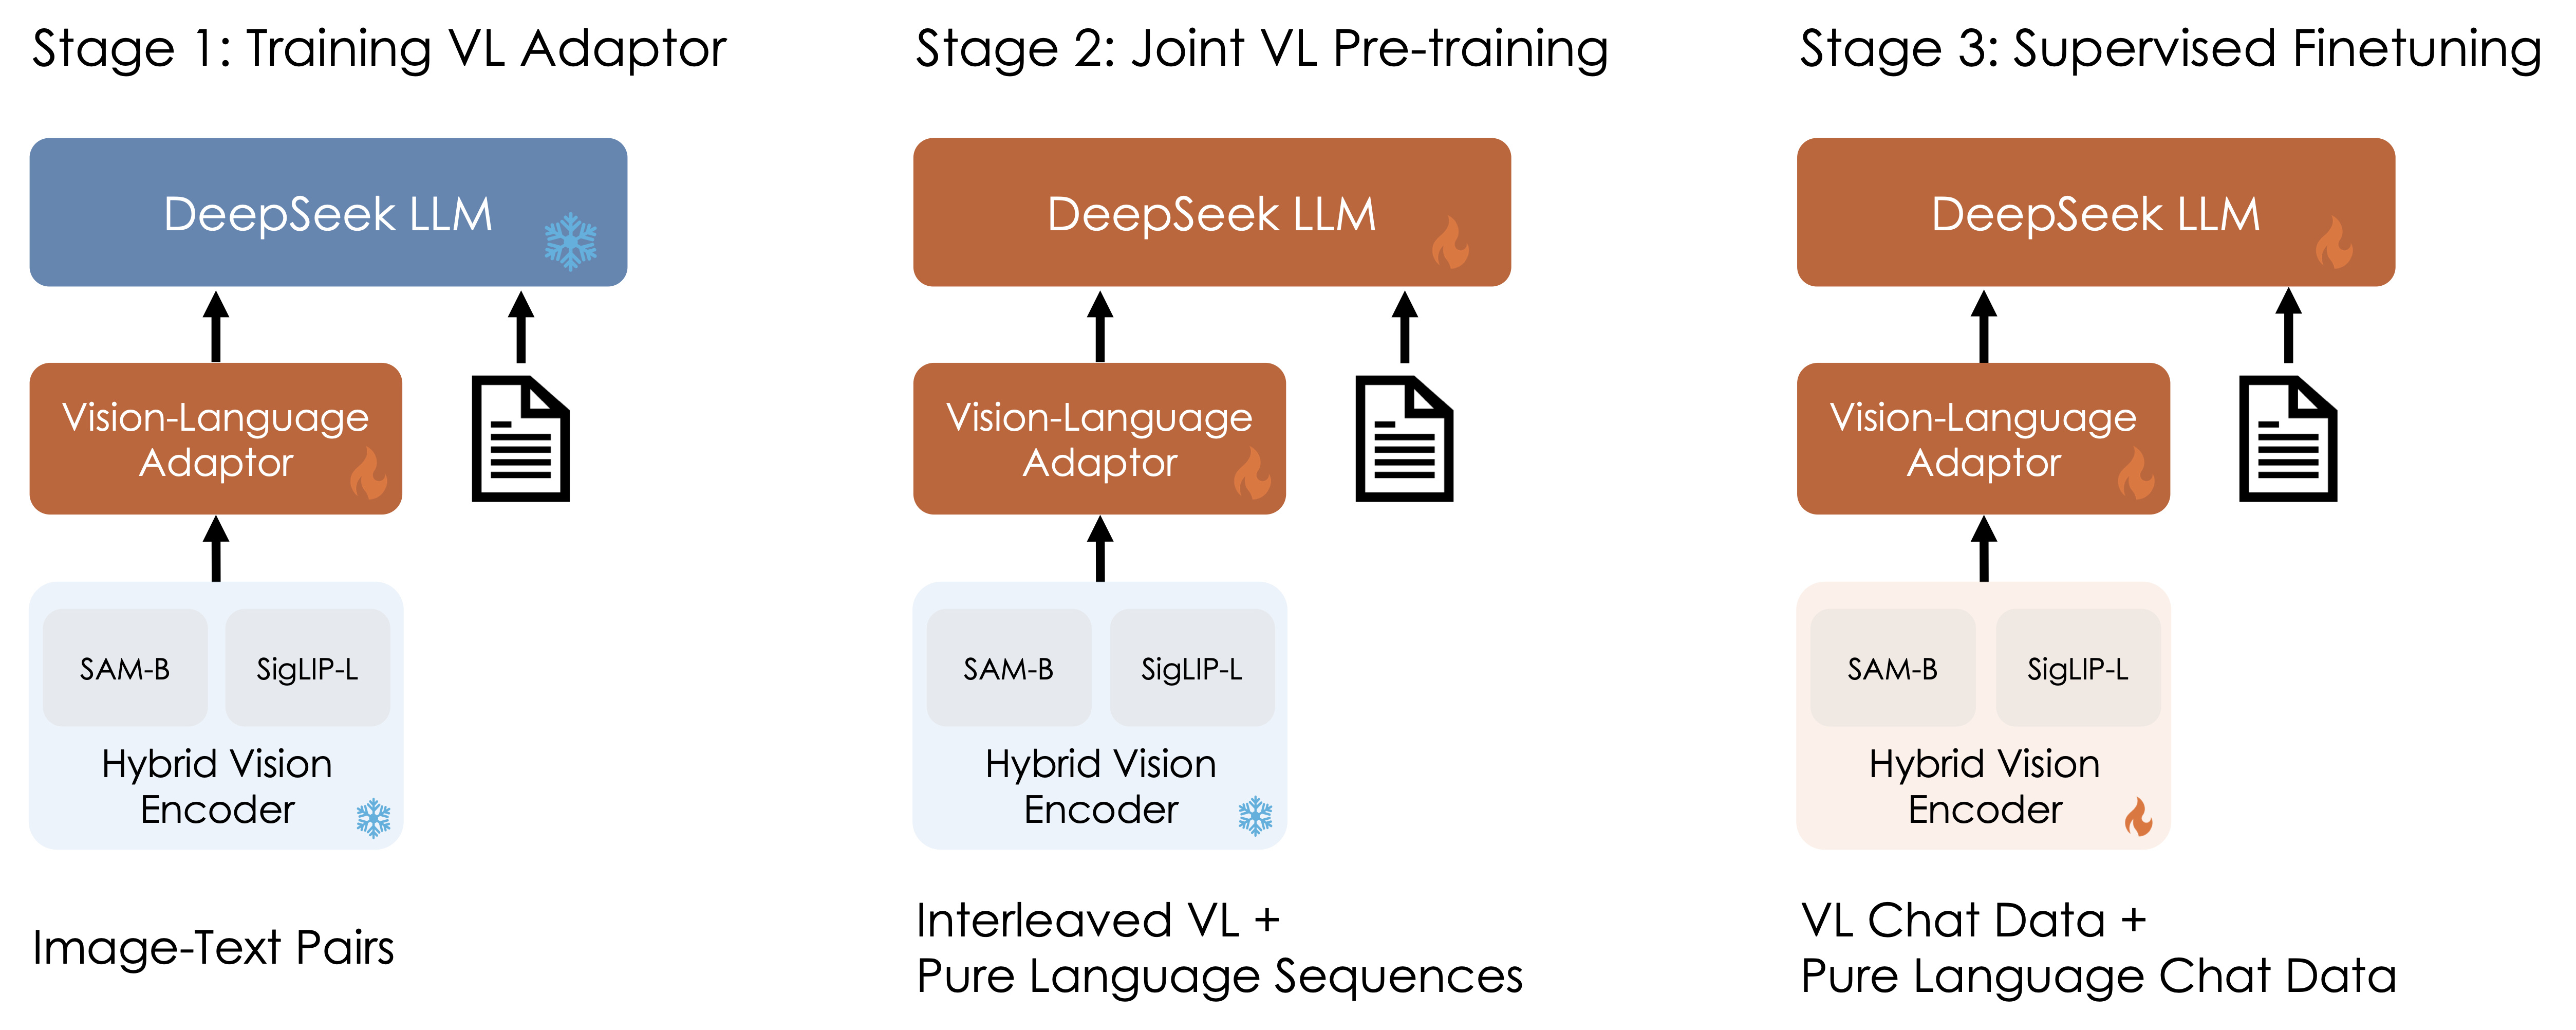

In [9]:
from PIL import Image
image = Image.open("/content/DeepSeek-VL/images/training_pipelines.jpg")
image

In [12]:
pil_images = load_pil_images(conversation)
prepare_inputs = vl_chat_processor(
    conversations=conversation,
    images=pil_images,
    force_batchify=True
).to(vl_gpt.device)

# run image encoder to get the image embeddings
inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

# run the model to get the response
outputs = vl_gpt.language_model.generate(
    inputs_embeds=inputs_embeds,
    attention_mask=prepare_inputs.attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=512,
    do_sample=False,
    use_cache=True
)

answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
print(f"{prepare_inputs['sft_format'][0]}", answer)

You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

User: <image_placeholder>Describe each stage of this image.

Assistant: The image depicts a sequence of three stages, each labeled with a different color and a corresponding icon. The stages are labeled as "Stage 1: Training VL Adapter," "Stage 2: Joint VL Pre-training," and "Stage 3: Supervised Fine-tuning."

In the first stage, labeled "Stage 1: Training VL Adapter," the image shows a process where a VL Adapter is trained. The VL Adapter is represented by a blue rectangle with a white "V" inside it, and it is connected to a "Video Adapter" with a white arrow pointing to it. The "Video Adapter" is depicted as a white rectangle with a black "V" inside it, and it is connected to a "Video Sequence" with a white arrow pointing to it.

In the second stage, labeled "Stage 2: Joint VL Pre-training," the ima

In [13]:
conversation = [
    {
        "role": "User",
        "content": "<image_placeholder>What is the type of lung cancer.",
        "images": ["/content/cancer.jpg"]
    },
    {
        "role": "Assistant",
        "content": ""
    }
]

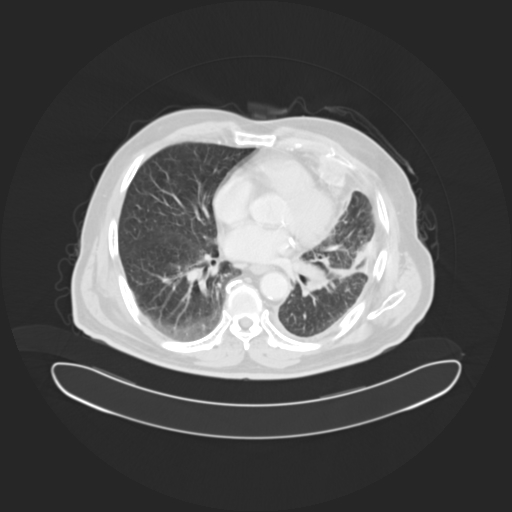

In [14]:
from PIL import Image
image = Image.open("/content/cancer.jpg")
image

In [15]:
pil_images = load_pil_images(conversation)
prepare_inputs = vl_chat_processor(
    conversations=conversation,
    images=pil_images,
    force_batchify=True
).to(vl_gpt.device)

# run image encoder to get the image embeddings
inputs_embeds = vl_gpt.prepare_inputs_embeds(**prepare_inputs)

# run the model to get the response
outputs = vl_gpt.language_model.generate(
    inputs_embeds=inputs_embeds,
    attention_mask=prepare_inputs.attention_mask,
    pad_token_id=tokenizer.eos_token_id,
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=512,
    do_sample=False,
    use_cache=True
)

answer = tokenizer.decode(outputs[0].cpu().tolist(), skip_special_tokens=True)
print(f"{prepare_inputs['sft_format'][0]}", answer)

You are a helpful language and vision assistant. You are able to understand the visual content that the user provides, and assist the user with a variety of tasks using natural language.

User: <image_placeholder>What is the type of lung cancer.

Assistant: The image provided is a CT scan of the chest, which is a type of medical imaging that uses a series of X-rays to create cross-sectional images of the body. The image shows a large, irregularly shaped mass within the lung, which is the most common type of lung cancer. The mass appears to be composed of a solid, non-cellular tissue with a central cavity, which is characteristic of a primary lung cancer.

The mass is surrounded by a thin, fibrous capsule, which is a common feature of primary lung cancer. The mass is not uniformly thick, but rather has a more irregular and uneven appearance, which is typical of lung cancer. The mass is not surrounded by any other masses or abnormal structures, and there are no signs of metastasis or oth